# 1. 필요한 라이브러리 로드

In [1]:
import pandas as pd

# 2. Data load

In [5]:
df = pd.read_csv('./Churn Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3. Data Analysis

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

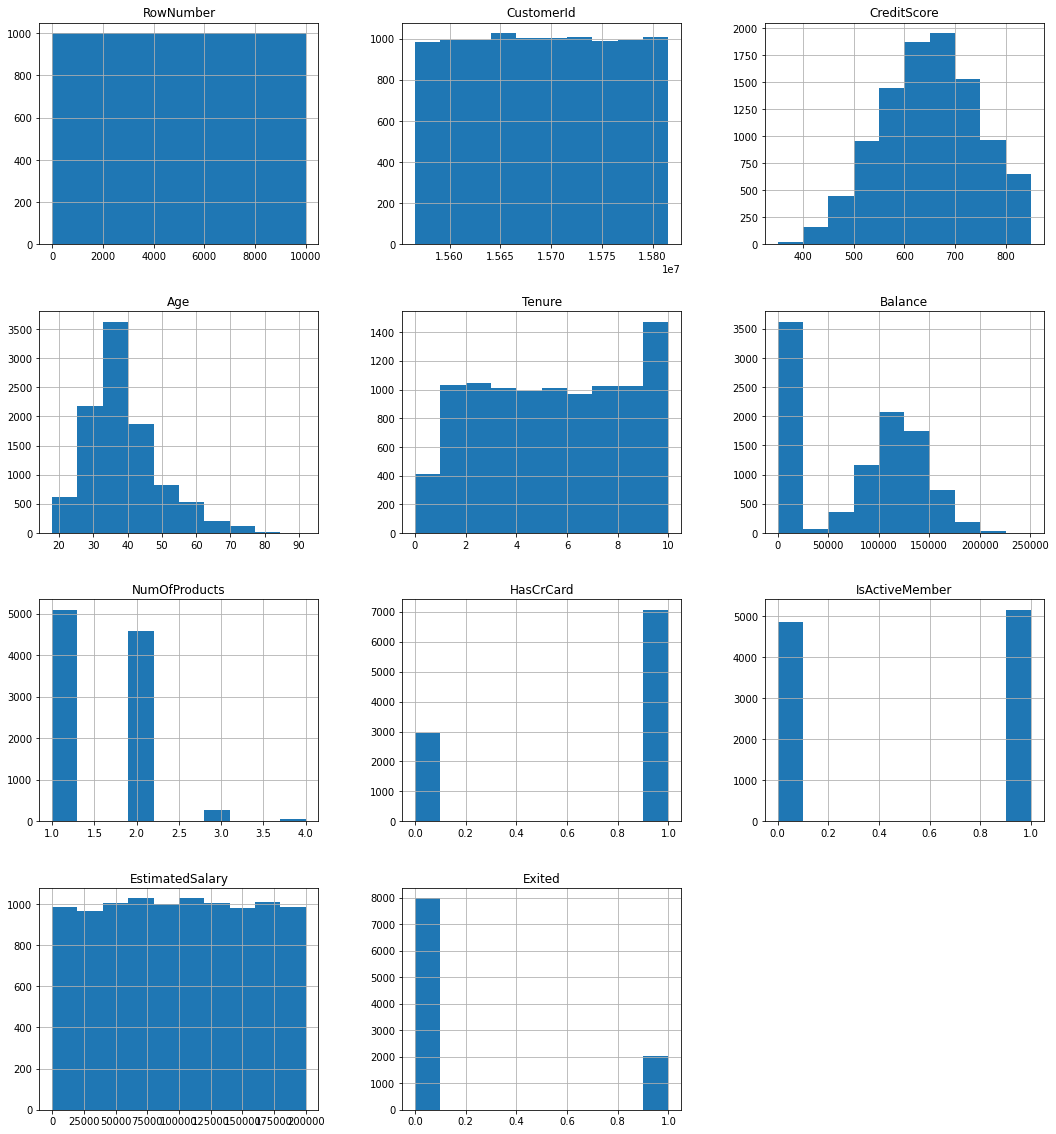

In [6]:
df.hist(figsize=(18,20))

# 4. Data Preprocess

In [7]:
# Gender, Geography column one hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
 14  Geography_France   10000 non-null  uint8  
 15  Geography_Germany  10000 non-null  uint8  
 16  Geography_Spain    1000

In [10]:
# RowNumber, CustomerId, Surname column drop!
df_sample_1 = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [12]:
df_final = df_sample_1

# 5. Construct model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
label_name='Exited'
X=df_final.drop(columns=label_name)
y=df_final[label_name]
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 13)

(8000,)

(2000, 13)

(2000,)

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'center':'Geography_France'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>],
       [<AxesSubplot:title={'center':'Geography_Spain'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

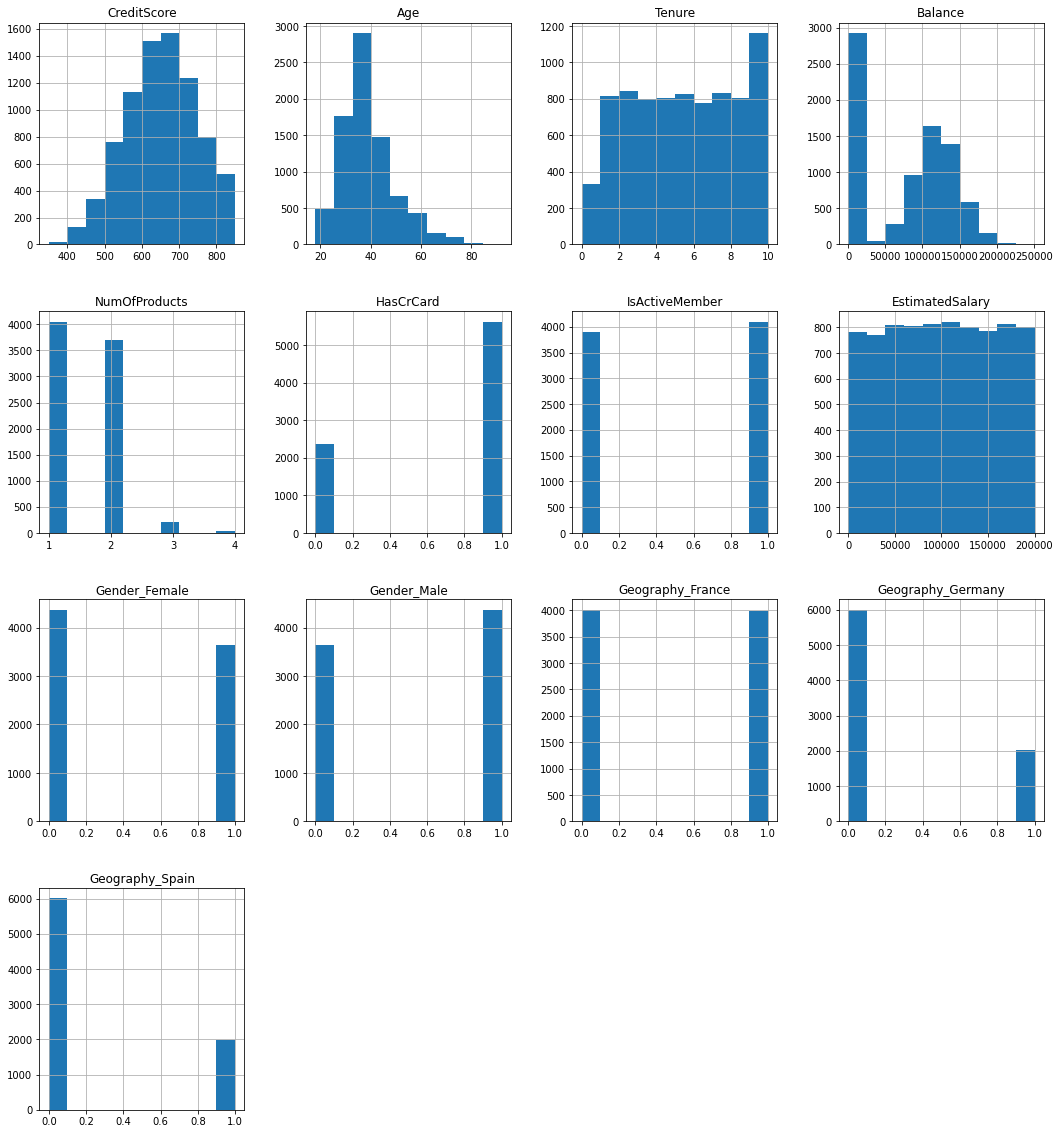

In [14]:
X_train.hist(figsize=(18,20))

In [17]:
# standard scaler
# CreditScore, Balance, EstimatedSalary
ss = StandardScaler()
X_train[['CreditScore_ss','Balance_ss','EstimatedSalary_ss']] = ss.fit(X_train[['CreditScore','Balance','EstimatedSalary']]).transform(X_train[['CreditScore','Balance','EstimatedSalary']])
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,CreditScore_ss,Balance_ss,EstimatedSalary_ss
9254,686,32,6,0.00,2,1,1,179093.26,0,1,1,0,0,0.356500,-1.218471,1.367670
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,1,0,-0.203898,0.696838,1.661254
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,0,0,1,-0.961472,0.618629,-0.252807
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,1,0,0,-0.940717,0.953212,0.915393
6669,517,56,9,142147.32,1,0,0,39488.04,0,1,1,0,0,-1.397337,1.057449,-1.059600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,1,1,0,0,1.207474,-0.102301,-0.539860
5191,682,58,1,0.00,1,1,1,706.50,1,0,1,0,0,0.314989,-1.218471,-1.733882
5390,735,38,1,0.00,3,0,0,92220.12,1,0,1,0,0,0.865009,-1.218471,-0.142765
860,667,43,8,190227.46,1,1,0,97508.04,0,1,1,0,0,0.159323,1.827259,-0.050826


array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'center':'Geography_France'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>],
       [<AxesSubplot:title={'center':'Geography_Spain'}>,
        <AxesSubplot:title={'center':'CreditScore_ss'}>,
        <AxesSubplot:title={'center':'Balance_ss'}>,
        <AxesSubplot:title={'center':'EstimatedSalary_ss'}>]],
      dtype=object)

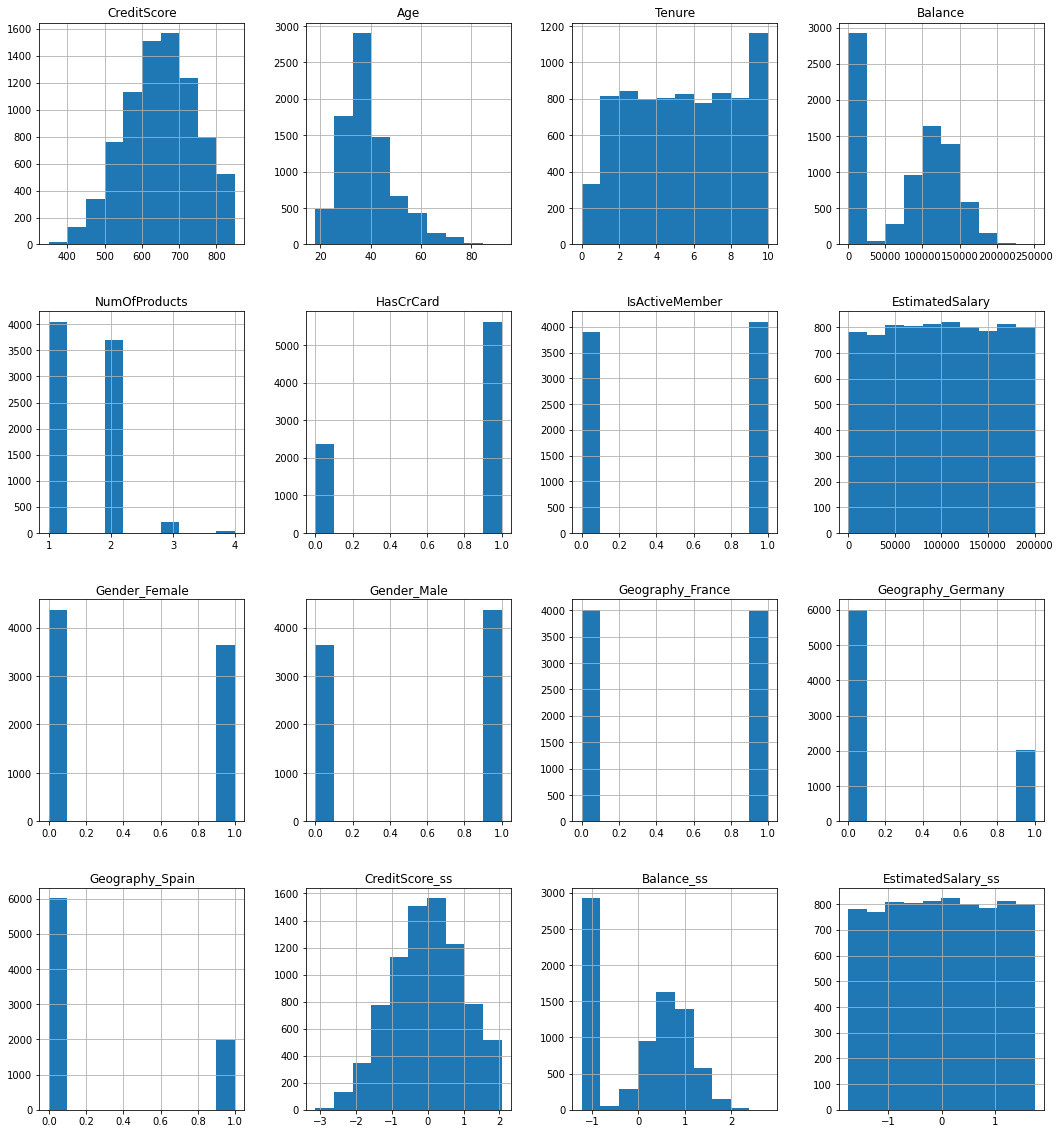

In [18]:
X_train.hist(figsize=(18,20))

In [19]:
X_train = X_train.drop(['CreditScore', 'Balance', 'EstimatedSalary'], axis=1)
X_train.columns

Index(['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'CreditScore_ss', 'Balance_ss',
       'EstimatedSalary_ss'],
      dtype='object')